In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading in data

In [31]:
x_path = '../data/ElectricPowerProduction/X.txt'
y_path = '../data/ElectricPowerProduction/Y.txt'

x=pd.read_csv(x_path,sep=';')
y=pd.read_csv(y_path,sep=';')

### Weather Data

In [33]:
x.head()

,Year,IsDayBin,Month,WindSpeed,IrrDirect,IrrDiffuse,Temperature,Percipitation,SnowFlow,SnowMass,AirDensity,RadSurface,RadTop,CloudCover
R1,2016,Night,1,5.777,0.0,0.0,-1.210,0.114,0.099,10.592,1.268,0.0,0.0,1.0
R2,2016,Night,1,5.887,0.0,0.0,-0.862,0.114,0.103,10.671,1.266,0.0,0.0,1.0
R3,2016,Night,1,5.957,0.0,0.0,-0.552,0.122,0.111,10.756,1.265,0.0,0.0,1.0
R4,2016,Night,1,6.025,0.0,0.0,-0.297,0.158,0.145,10.855,1.264,0.0,0.0,1.0
R5,2016,Night,1,6.101,0.0,0.0,-0.149,0.164,0.081,10.884,1.263,0.0,0.0,1.0


### Power production data

In [38]:
y.head(10)

,WindPower,PVPower
R1,396.352,0.000
R2,417.778,0.000
R3,434.581,0.000
R4,448.482,0.000
R5,465.790,0.000
R6,485.960,0.000
R7,501.274,0.000
R8,489.209,0.000
R9,439.592,0.000
R10,424.806,0.229


### Data size

In [49]:
print(x.shape)
print(y.shape)

(26304, 14)
(26304, 2)


### Correlation matrix 

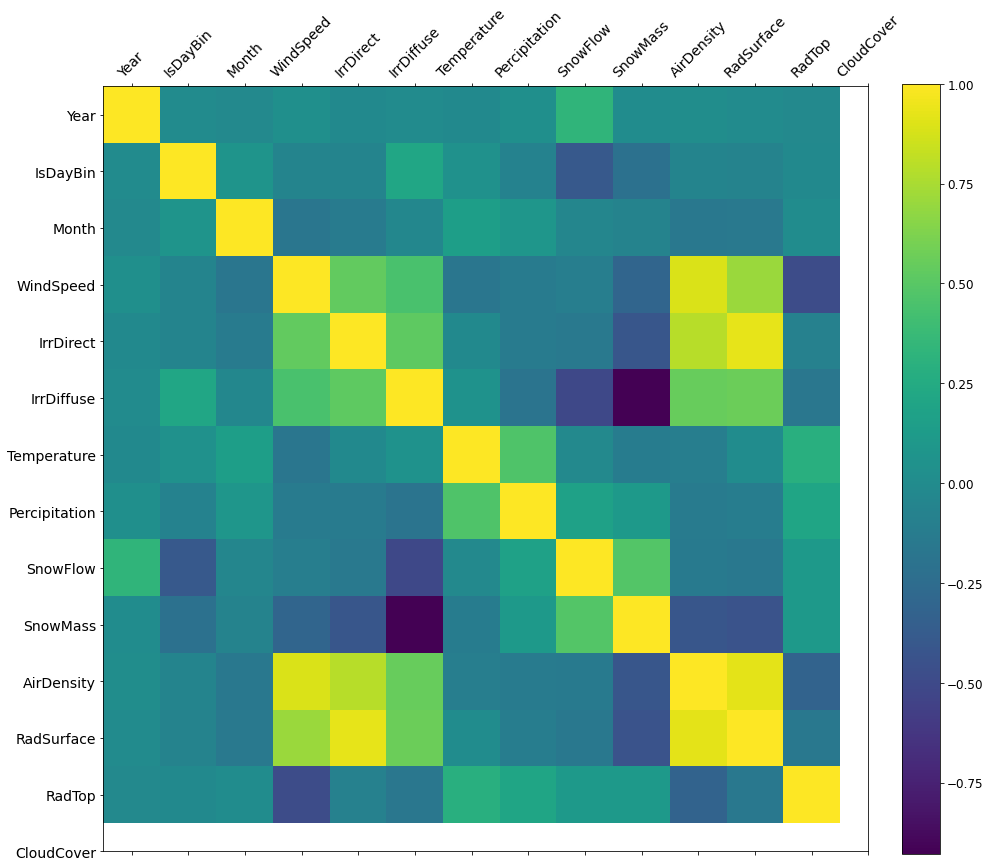

In [37]:
f = plt.figure(figsize=(15, 15))
plt.matshow(x.corr(), fignum=f.number)
plt.xticks(range(x.shape[1]), x.columns, fontsize=14, rotation=45)
plt.yticks(range(x.shape[1]), x.columns, fontsize=14)
cb = plt.colorbar(fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize=12)

### IsDayBin categories

In [42]:
print(x['IsDayBin'].unique())

['Night' 'Day']


### Dropping categorical data

In [46]:
X=x.drop(['Year','IsDayBin','Month'],axis=1)

X.head()

,WindSpeed,IrrDirect,IrrDiffuse,Temperature,Percipitation,SnowFlow,SnowMass,AirDensity,RadSurface,RadTop,CloudCover
R1,5.777,0.0,0.0,-1.210,0.114,0.099,10.592,1.268,0.0,0.0,1.0
R2,5.887,0.0,0.0,-0.862,0.114,0.103,10.671,1.266,0.0,0.0,1.0
R3,5.957,0.0,0.0,-0.552,0.122,0.111,10.756,1.265,0.0,0.0,1.0
R4,6.025,0.0,0.0,-0.297,0.158,0.145,10.855,1.264,0.0,0.0,1.0
R5,6.101,0.0,0.0,-0.149,0.164,0.081,10.884,1.263,0.0,0.0,1.0


### Data plots

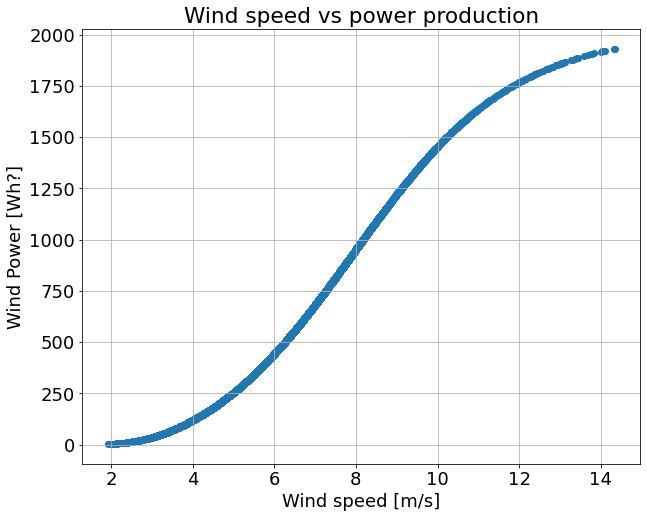

In [62]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(10,8))
plt.scatter(X['WindSpeed'],y['WindPower'])
plt.xlabel("Wind speed [m/s]")
plt.ylabel("Wind Power [Wh?]")
plt.title("Wind speed vs power production")
plt.grid()
plt.show()

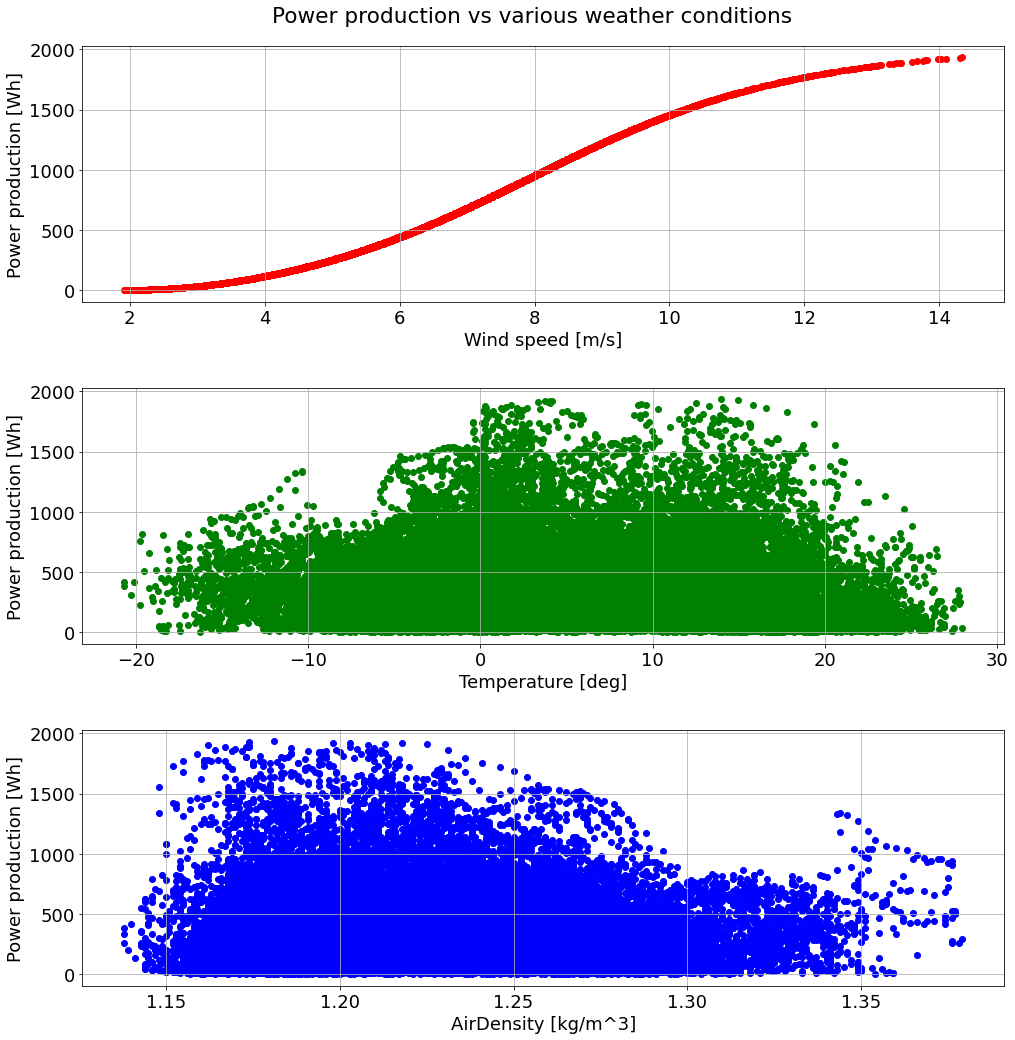

In [82]:
## Plots
fig,axs = plt.subplots(3,1,figsize=(15,15))
fig.tight_layout(pad=3.0)

plt.sca(axs[0])
plt.scatter(X['WindSpeed'],y['WindPower'], c='r')
plt.title('')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Power production [Wh]')
plt.grid()
#plt.legend(loc='lower right')

plt.sca(axs[1])
plt.scatter(X['Temperature'],y['WindPower'], c='g')
#plt.title(')
plt.xlabel('Temperature [deg]')
plt.ylabel('Power production [Wh]')
plt.grid()
#plt.legend()

plt.sca(axs[2])
plt.scatter(X['AirDensity'],y['WindPower'], c='b')
#plt.title('')
plt.xlabel('AirDensity [kg/m^3]')
plt.ylabel('Power production [Wh]')
plt.grid()
#plt.legend(loc='upper right')

fig.suptitle('Power production vs various weather conditions')
plt.show()

<img src='./images/lr.jpg'>